# **Universidad del Desarrollo - Magister en Data Science**

## **Trabajo Final Python**
### **Entrega: 15 de Agosto de 2021**

### **Integrantes:**
- Ileana Pastran
- William Marin
- Ana Harringthon

### **Preámbulo:** 

Para el trabajo Final, se han definido los siguientes objetivos de acuerdo a las opciones dadas:

**Función:** 
Realizar la construcción de una función que calcule la positividad por region en Chile, de acuerdo a una fecha particular que será el valor de entrada a dicha función. 

Para ello, procederemos a trabajar con 3 productos de datos que se requieren para realizar este cálculo: 

- Producto 3 (Casos Totales por Región)
- Producto 7 (Test PCR realizados)
- Producto 87 (Test de Antígenos realizados)

Esto con el fin de completar lo requerido para la siguiente fórmnula: 



$Positividad de Casos Sospechosos(\%) = \frac{Test positivos realizados en el dia}{Total de tests realizados} * 100$

**Gráficos:**

Realizar las siguientes gráficas:  

- **Casos totales por Distrito:** Se tomó la opción de realizar una comparación de 2 distritos (Distrito 17 y 18 correspondientes a la Región del Maule). 
- **Velocidad de contagio**:Se tomó la opción de realizar una comparación de 2 distritos (Distrito 17 y 18 correspondientes a la Región del Maule).
- **Positividad por Región:** Se tomó la opción de realizar una comparación de 2 Regiones (Región del Maule y Coquimbo). **Nota:** Para el cálculo de la positividad no se encontraron productos de datos que proporcionaran el numero de test realizados por comuna. 

Datos y cálculos utilizados para la preparación de las gráficas: 

- **Casos totales por Distrito:** Se utilizó el Producto 1(Casos totales por Comuna) para el gráfico de casos totales acumulados en los distritos seleccionados y se realizó cierto procesamiento en el mismo producto, lo cual se explicará en el desarrollo del Notebook para graficar casos nuevos diarios en ambos distritos. 

- ****Velocidad de contagio:**** Se utilizó el Producto 6(Casos totales por Comuna con información de incidencia), ya que se debe calcular la incidencia por cada 100.000 habitantes lo cual es el número de casos nuevos entre la población total. Se calculará tanto la incidencia acumulada como la puntual.

- **Positividad por Región**: En base a lo realizado en la construcción de la función con un enfoque histórico. Se utilizarán los mismos productos utilizados para el desarrollo de la función.  



In [1]:
# Importación de las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import datetime
from datetime import date, timedelta
warnings.filterwarnings('ignore')

Se realiza lectura y limpieza de datos para el calculo de Positividad y contrucción de función

In [2]:
Totales=df = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/TotalesPorRegion.csv') #Producto 3
Totales.head()

,Region,Categoria,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,...,2021-08-06,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15
0,Arica y Parinacota,Casos acumulados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26411,26428,26435,26460,26469,26482,26493,26507,26520,26528
1,Tarapacá,Casos acumulados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40521,40551,40570,40597,40625,40666,40755,40734,40756,40776
2,Antofagasta,Casos acumulados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,59947,59988,60007,60025,60031,60092,60164,60218,60229,60245
3,Atacama,Casos acumulados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26830,26837,26853,26871,26893,26904,26920,26917,26934,26940
4,Coquimbo,Casos acumulados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,47821,47857,47889,47915,47939,47958,47996,48020,48042,48084


In [3]:
PCR_hechos=pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv') #Producto7
PCR_hechos.head()

,Region,Codigo region,Poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2021-08-06,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15
0,Arica y Parinacota,15,252110,70.0,NaN,93.0,103.0,NaN,93.0,24.0,...,1161,1360,1276,1506,613,688,1338,1215,1008,1077
1,Tarapacá,1,382773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1795,1395,1512,2132,1677,1324,1870,1416,1158,1321
2,Antofagasta,2,691854,182.0,128.0,107.0,175.0,103.0,95.0,117.0,...,2170,1848,2281,4075,4144,1241,2833,1987,1913,1962
3,Atacama,3,314709,57.0,52.0,60.0,25.0,20.0,22.0,25.0,...,1272,1439,1462,1074,903,287,1866,1180,1375,1264
4,Coquimbo,4,836096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2253,2393,2127,2168,1085,757,2389,1827,2085,2313


In [4]:
Ag_hechos=pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto87/Ag.csv') #Producto87
Ag_hechos.head()

,Region,Codigo region,Poblacion,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,...,2021-08-06,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15
0,Arica y Parinacota,15,252110,241,132,116,113,166,210,213,...,608,555,556,492,99,821,595,620,596,596
1,Tarapacá,1,382773,93,71,22,28,118,82,82,...,159,203,142,117,140,213,169,184,568,316
2,Antofagasta,2,691854,29,39,24,32,46,33,42,...,109,166,160,97,108,121,141,154,75,101
3,Atacama,3,314709,61,55,67,62,79,50,77,...,94,93,44,49,44,138,85,88,95,66
4,Coquimbo,4,836096,138,118,68,55,81,115,132,...,120,92,85,86,42,108,133,73,69,50


Para el cálculo de la positividad, sólo es necesario obtener los casos nuevos totales, por lo que se realiza un filtro en la columna Categoria para quedarnos sólo con esta data:

In [5]:
CasosT=Totales[(Totales["Categoria"]=="Casos nuevos totales")] 
CasosT.head()

,Region,Categoria,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,...,2021-08-06,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15
17,Arica y Parinacota,Casos nuevos totales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15,19,9,23,9,14,14,20,14,8
18,Tarapacá,Casos nuevos totales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40,30,20,23,28,19,72,15,21,20
19,Antofagasta,Casos nuevos totales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,83,41,20,17,6,13,29,13,11,17
20,Atacama,Casos nuevos totales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,7,16,15,22,11,16,4,17,6
21,Coquimbo,Casos nuevos totales,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33,36,33,25,24,19,38,28,22,42


In [6]:
CasosT=CasosT.set_index("Region")

In [7]:
PCR_hechos=PCR_hechos.set_index("Region")

In [8]:
Ag_hechos[(Ag_hechos["Region"]=="Se desconoce región de origen")] 

,Region,Codigo region,Poblacion,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,...,2021-08-06,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15
16,Se desconoce región de origen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


El item "Se desconoce región de origen no trae ningún tipo de información de valor, por lo que se procede a limpiar de la data: 

In [9]:
Ag_hechos=Ag_hechos.set_index('Region')

In [10]:
Ag_hechos=Ag_hechos.drop("Se desconoce región de origen", axis=0) 

Se construye nuevo dataframe que contenga el total de test PCR y Ag:

In [11]:
CasosT=CasosT.loc[:,"2020-03-03"::]

In [12]:
PCR_hechos=PCR_hechos.loc[:,"2020-04-09"::]

In [13]:
Ag_hechos=Ag_hechos.loc[:,"2021-06-05"::]

Se suman los dataframes desde la fecha de primer registro de test antígenos y se une la suma realizada previamente con la parte del dataframe de PCRs entre 9 de Abril de 2020 hasta el 5 de Junio de 2021 (no existía información de testeo por Ag)

In [14]:
AgPCR=PCR_hechos.loc[:,"2021-06-05"::].fillna(0) + Ag_hechos.loc[:,"2021-06-05"::] #suma 

In [15]:
PCR_AG=PCR_hechos.loc[:,"2020-04-09":"2021-06-04"].merge(AgPCR, how='inner' ,on=['Region']) #unión

Se agrega la fila Total para conocer la positividad a nivel nacional:

In [16]:
PCR_AG=PCR_AG.append(PCR_AG.sum().rename('Total')) 
PCR_AG

,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,...,2021-08-06,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15
Region,,,,,,,,,,,,,,,,,,,,,
Arica y Parinacota,70.0,NaN,93.0,103.0,NaN,93.0,24.0,198.0,131.0,NaN,...,1769.0,1915.0,1832.0,1998.0,712.0,1509.0,1933.0,1835.0,1604.0,1673.0
Tarapacá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,60.0,...,1954.0,1598.0,1654.0,2249.0,1817.0,1537.0,2039.0,1600.0,1726.0,1637.0
Antofagasta,182.0,128.0,107.0,175.0,103.0,95.0,117.0,117.0,143.0,200.0,...,2279.0,2014.0,2441.0,4172.0,4252.0,1362.0,2974.0,2141.0,1988.0,2063.0
Atacama,57.0,52.0,60.0,25.0,20.0,22.0,25.0,29.0,37.0,50.0,...,1366.0,1532.0,1506.0,1123.0,947.0,425.0,1951.0,1268.0,1470.0,1330.0
Coquimbo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2373.0,2485.0,2212.0,2254.0,1127.0,865.0,2522.0,1900.0,2154.0,2363.0
Valparaíso,301.0,249.0,248.0,273.0,223.0,92.0,385.0,240.0,246.0,330.0,...,5787.0,5586.0,5246.0,4486.0,2323.0,2688.0,6259.0,5935.0,5631.0,5685.0
Metropolitana,5383.0,3185.0,2105.0,3861.0,1850.0,1656.0,2694.0,4356.0,3670.0,2744.0,...,20083.0,21751.0,20316.0,18854.0,10320.0,11660.0,22107.0,22535.0,20824.0,20588.0
O’Higgins,68.0,NaN,74.0,NaN,74.0,30.0,30.0,58.0,50.0,NaN,...,2961.0,2140.0,2749.0,2088.0,1061.0,1024.0,2170.0,2561.0,2673.0,2695.0
Maule,397.0,219.0,NaN,341.0,113.0,160.0,NaN,469.0,367.0,176.0,...,3925.0,4129.0,3490.0,3218.0,878.0,1739.0,3548.0,4339.0,4042.0,4129.0


### **Funciones:**

Se realiza una función para insertar colores de umbral al dataframe resultante de calcular la positividad para todas las regiones en una fecha determinada:

In [17]:
def umbral_color(val):
    
    if val >= 10:
        color = 'red'
    elif (val < 10 and val >= 5 ):
        color = 'orange'
    elif (val < 5 and val >= 3 ):
        color = 'yellow'
    else:
        color = 'green'
    
    return "background-color: %s" % color#'color: %s' % color


Se construye función para el cálculo de la positividad: 

Esta función tiene como entrada la fecha que se requiere calcular la positividad y como salida el valor de la positividad para cada una de las regiones y a nivel nacional(Total) para dicha fecha, además, se obtiene una clasificacion de dicho valor de acuerdo al umbral definido: 

"*Positividad de casos sospechosos: umbrales progresivos desde <10% [1]nivel 2 (naranjo), < 5% [1]durante el nivel 3 (amarillo), y<3% [2,3]en el nivel 4 (verde)*"

**Nota:** Se agregó el color Rojo para casos mayores al 10%

Fuente: https://udd.instructure.com/courses/25202/assignments/128899


In [18]:
def calculo_positividad(x):
    
    positividad = CasosT[x] /  PCR_AG[x]*100
    
    lista_epi = []
    
    for i in positividad:

        if i >= 10:
            epi = "Transición a Rojo" #Por ser mayor a 10
        elif (i < 10 and i >= 5 ):
            epi = "Transición a Naranja"
        elif (i < 5 and i >= 3):
            epi = "Transición a Amarilla"
        else:
            epi = "Trancisión a Verde"

        lista_epi.append(epi)

    salida_umbral = pd.concat([positividad.reset_index("Region"), pd.DataFrame(lista_epi)],axis=1) 
    salida_umbral.rename(columns = {0:'UMBRAL'}, inplace = True)  
    
    
    return positividad,salida_umbral.style.applymap(umbral_color, subset=[x])



In [19]:
x="2021-07-02" #Fecha a Calcular

positividad,salida_umbral = calculo_positividad(x)

In [20]:
positividad


Region
Arica y Parinacota    5.889145
Tarapacá              4.154728
Antofagasta           5.261194
Atacama               9.666283
Coquimbo              7.271733
Valparaíso            5.945012
Metropolitana         6.244768
O’Higgins             3.733919
Maule                 6.192415
Ñuble                 4.330312
Biobío                4.383817
Araucanía             9.018405
Los Ríos              8.448653
Los Lagos             3.694897
Aysén                 5.617978
Magallanes            2.829426
Total                 5.754443
Name: 2021-07-02, dtype: float64

In [21]:
salida_umbral

,Region,2021-07-02,UMBRAL
0,Arica y Parinacota,5.889145,Transición a Naranja
1,Tarapacá,4.154728,Transición a Amarilla
2,Antofagasta,5.261194,Transición a Naranja
3,Atacama,9.666283,Transición a Naranja
4,Coquimbo,7.271733,Transición a Naranja
5,Valparaíso,5.945012,Transición a Naranja
6,Metropolitana,6.244768,Transición a Naranja
7,O’Higgins,3.733919,Transición a Amarilla
8,Maule,6.192415,Transición a Naranja
9,Ñuble,4.330312,Transición a Amarilla


In [22]:
x="2021-06-02" #Fecha a Calcular

positividad2,salida_umbral2 = calculo_positividad(x)

In [23]:
positividad2

Region
Arica y Parinacota     7.332491
Tarapacá               9.579832
Antofagasta            6.532067
Atacama               11.287988
Coquimbo              12.154696
Valparaíso            15.466392
Metropolitana         16.078030
O’Higgins             21.812822
Maule                 25.703125
Ñuble                 15.419847
Biobío                 9.271845
Araucanía             19.421102
Los Ríos              15.599174
Los Lagos             10.029375
Aysén                 12.546816
Magallanes             9.090909
Total                 14.408536
Name: 2021-06-02, dtype: float64

In [24]:
salida_umbral2

,Region,2021-06-02,UMBRAL
0,Arica y Parinacota,7.332491,Transición a Naranja
1,Tarapacá,9.579832,Transición a Naranja
2,Antofagasta,6.532067,Transición a Naranja
3,Atacama,11.287988,Transición a Rojo
4,Coquimbo,12.154696,Transición a Rojo
5,Valparaíso,15.466392,Transición a Rojo
6,Metropolitana,16.078030,Transición a Rojo
7,O’Higgins,21.812822,Transición a Rojo
8,Maule,25.703125,Transición a Rojo
9,Ñuble,15.419847,Transición a Rojo


Se realizó la ejecución de la función para los días 02 de Junio y 02 de Julio de 2021, encontrando altos indicadores de positividad para el dia 02 de Junio y notando una mejoría importante en el indicador justo un mes después. 

Destacar que los valores de positividad que calcula el ministerio, sólo consideran exámenes PCR y por esta razón pueden existir diferencias en los indicadores ya que estamos considerando el total de test diarios sin discriminar los tests realizados por Antígeno.

Sin embargo, se tomó un reporte antiguo para comparar cuando no existía este tipo de test y obtenemos el mismo valor: 

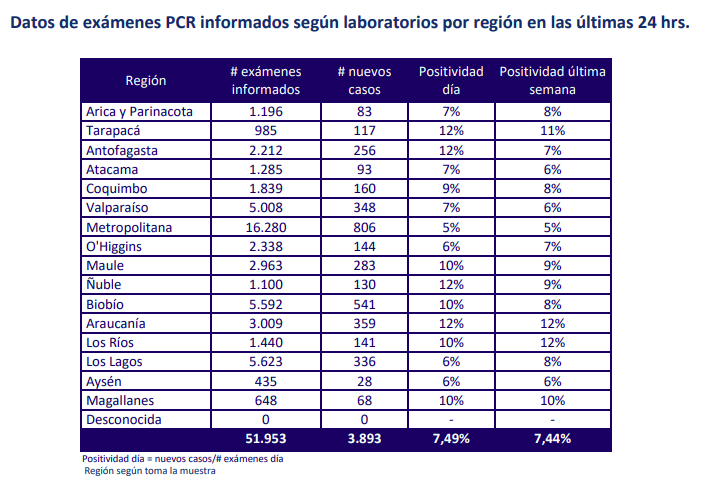

In [25]:
x="2021-02-20" #Fecha a Calcular

positividad3,salida_umbral3 = calculo_positividad(x)
positividad3

Region
Arica y Parinacota     6.939799
Tarapacá              11.878173
Antofagasta           11.573237
Atacama                7.237354
Coquimbo               8.700381
Valparaíso             6.948882
Metropolitana          4.950860
O’Higgins              6.159110
Maule                  9.551131
Ñuble                 11.818182
Biobío                 9.674535
Araucanía             11.930874
Los Ríos               9.791667
Los Lagos              5.975458
Aysén                  6.436782
Magallanes            10.493827
Total                  7.493311
Name: 2021-02-20, dtype: float64

## **Gráficas:**

Se realiza lectura y limpieza de datos para la contrucción de las gráficas:

In [26]:
Graf_T=pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19_std.csv") #Producto 1
Graf_T.head()


,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Fecha,Casos confirmados
0,Arica y Parinacota,15,Arica,15101.0,247552.0,2020-03-30,6.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,2020-03-30,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,2020-03-30,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,2020-03-30,0.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,2020-03-30,NaN


In [27]:
Incidencia=pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto6/bulk/data.csv") #Producto 6
Incidencia.head()

,Poblacion,Casos Confirmados,Fecha,Region ID,Region,Provincia ID,Provincia,Comuna ID,Comuna,Tasa
0,247552.0,6577.0,2020/08/24,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,2656.815537745605
1,247552.0,24247.0,2021/05/21,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,9794.709798345399
2,247552.0,11212.0,2021/01/01,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,4529.14943123061
3,247552.0,26258.0,2021/06/11,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,10607.064374353671
4,247552.0,10798.0,2020/12/14,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,4361.911840744571


### **Casos Totales por Distrito 17 y 18** 

Se realiza filtro por Región del Maule y comunas correspondientes a Distrito 17 y 18: 

- **Distrito 17:**

  CURICO\
  HUALAÑE\
LICANTEN\
MOLINA\
RAUCO\
ROMERAL\
SAGRADA FAMILIA\
TENO\
VICHUQUEN\
CONSTITUCION\
CUREPTO\
EMPEDRADO\
MAULE\
PELARCO\
PENCAHUE\
RIO CLARO\
SAN CLEMENTE\
SAN RAFAEL


- **Distrito 18:**

  CAUQUENES0\
CHANCO\
PELLUHUE\
COLBUN\
LINARES\
LONGAVI\
PARRAL\
RETIRO\
SAN JAVIER\
VILLA ALEGRE\
YERBAS BUENAS\


**Fuente:** https://www.servel.cl/territorios-electorales/

In [28]:
Maule=Graf_T[Graf_T["Region"] == "Maule"]

In [29]:
Maule

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Fecha,Casos confirmados
175,Maule,7,Cauquenes,7201.0,44143.0,2020-03-30,0.0
176,Maule,7,Chanco,7202.0,9331.0,2020-03-30,0.0
177,Maule,7,Colbun,7402.0,22565.0,2020-03-30,0.0
178,Maule,7,Constitucion,7102.0,50348.0,2020-03-30,0.0
179,Maule,7,Curepto,7103.0,9426.0,2020-03-30,0.0
...,...,...,...,...,...,...,...
52691,Maule,7,Teno,7308.0,30850.0,2021-08-13,3232.0
52692,Maule,7,Vichuquen,7309.0,4381.0,2021-08-13,387.0
52693,Maule,7,Villa Alegre,7407.0,17512.0,2021-08-13,1406.0
52694,Maule,7,Yerbas Buenas,7408.0,19200.0,2021-08-13,1893.0


In [30]:
Distrito17=Maule[Maule["Comuna"].isin(["Curico","Hualane","Licanten","Molina",
                            "Rauco","Romeral","Sagrada Familia","Teno","Vichuquen","Constitucion","Curepto",
                            "Empedrado","Maule","Pelarco","Pencahue","Rio Claro",
                            "San Clemente","San Rafael","Talca"])]
Distrito17.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Fecha,Casos confirmados
178,Maule,7,Constitucion,7102.0,50348.0,2020-03-30,0.0
179,Maule,7,Curepto,7103.0,9426.0,2020-03-30,0.0
180,Maule,7,Curico,7301.0,163626.0,2020-03-30,6.0
181,Maule,7,Empedrado,7104.0,4206.0,2020-03-30,0.0
182,Maule,7,Hualane,7302.0,10222.0,2020-03-30,0.0


In [31]:
Distrito18=Maule[Maule["Comuna"].isin(['Chanco', 'Pelluhue', 'Colbun', 'Linares', 'Longavi', 'Parral', 'Retiro', 'San Javier', 'Villa Alegre', 'Yerbas Buenas'])]
Distrito18.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Fecha,Casos confirmados
176,Maule,7,Chanco,7202.0,9331.0,2020-03-30,0.0
177,Maule,7,Colbun,7402.0,22565.0,2020-03-30,0.0
184,Maule,7,Linares,7401.0,101073.0,2020-03-30,4.0
185,Maule,7,Longavi,7403.0,32810.0,2020-03-30,0.0
188,Maule,7,Parral,7404.0,44544.0,2020-03-30,4.0


Se agrupa por el campo fecha y se realiza suma por casos confirmados para cada uno de los Distritos:

In [32]:
Casos_17= Distrito17[['Fecha','Casos confirmados']].groupby(['Fecha']).agg('sum').reset_index()

Casos_17['Fecha'] = pd.to_datetime(Casos_17['Fecha'], #convertir campo fecha a tipo de dato fecha
                         errors ='coerce')

Casos_18= Distrito18[['Fecha','Casos confirmados']].groupby(['Fecha']).agg('sum').reset_index()

Casos_18['Fecha'] = pd.to_datetime(Casos_17['Fecha'], #convertir campo fecha a tipo de dato fecha
                         errors ='coerce')

Para obtener el número de casos nuevos diarios por distrito, se utilizó la función .diff() de la librería pandas. 

Para evitar el null en la primera fila se utilizó un df auxiliar para duplicar el primer registro y se eliminó posteriormente:

In [33]:
df_aux_dia = Casos_17[Casos_17.Fecha=='2020-03-30']
df_aux_dia["Casos confirmados"] = 0
df_aux_dia

Casos_17= pd.concat([df_aux_dia,Casos_17])
Casos_17['Casos_nuevos_diarios']=Casos_17["Casos confirmados"].diff() 
Casos_17.reset_index(drop=True, inplace=True)
Casos_17.drop(index=Casos_17.index[0], axis=0, inplace=True)
Casos_17

,Fecha,Casos confirmados,Casos_nuevos_diarios
1,2020-03-30,40.0,40.0
2,2020-04-01,45.0,5.0
3,2020-04-03,53.0,8.0
4,2020-04-06,61.0,8.0
5,2020-04-08,69.0,8.0
...,...,...,...
142,2021-07-30,75793.0,201.0
143,2021-08-02,75971.0,178.0
144,2021-08-06,76123.0,152.0
145,2021-08-09,76268.0,145.0


In [34]:
#para mantener primera fila y no obtener nan como resultado con diff: 
df_aux_dia = Casos_18[Casos_18.Fecha=='2020-03-30']
df_aux_dia["Casos confirmados"] = 0
df_aux_dia

Casos_18= pd.concat([df_aux_dia,Casos_18])
Casos_18['Casos_nuevos_diarios']=Casos_18["Casos confirmados"].diff() 
Casos_18.reset_index(drop=True, inplace=True)
Casos_18.drop(index=Casos_18.index[0], axis=0, inplace=True)
Casos_18

,Fecha,Casos confirmados,Casos_nuevos_diarios
1,2020-03-30,8.0,8.0
2,2020-04-01,10.0,2.0
3,2020-04-03,14.0,4.0
4,2020-04-06,23.0,9.0
5,2020-04-08,28.0,5.0
...,...,...,...
142,2021-07-30,31024.0,81.0
143,2021-08-02,31069.0,45.0
144,2021-08-06,31128.0,59.0
145,2021-08-09,31159.0,31.0


### **Velocidad de contagio por Distrito 17 y 18** 

Para el cálculo de la velocidad se realizará la lectura del producto 6 ya que este producto trae informacion sobre el total de casos acumulados y adicionalmente contiene la población general. 

Se calculará la velocidad de contagio tanto puntual como acumulada por medio de la siguiente formula: 

$Velocidad de contagio = \frac{Total número de casos}{Población total} x 100000 habitantes$

Se realiza filtro por región del Maule y posteriormente se identifica el Distrito 17 y 18:

In [35]:
Maule_Incidencia=Incidencia[Incidencia["Region"]=="Maule"]   

In [36]:
Maule_Incidencia17=Maule_Incidencia[Maule_Incidencia["Comuna"].isin(["Curicó","Hualañé","Licantén","Molina",
                            "Rauco","Romeral","Sagrada Familia","Teno","Vichuquén","Constitución","Curepto",
                            "Empedrado","Maule","Pelarco","Pencahue","Río Claro",
                            "San Clemente","San Rafael","Talca"])] 

In [37]:
Maule_Incidencia18=Maule_Incidencia[Maule_Incidencia["Comuna"].isin(['Chanco', 'Cauquenes','Pelluhue', 'Colbún', 'Linares', 'Longavi', 'Parral', 
                                                                    'Retiro', 'San Javier', 'Villa Alegre', 'Yerbas Buenas'])] 

Se agrupa por el campo fecha y se realiza suma por casos confirmados y población para cada una de las comunas contenidas en cada distrito:

In [38]:
Comunas17=Maule_Incidencia17.groupby(["Fecha","Comuna","Poblacion"])[["Casos Confirmados"]].sum().reset_index() #Se obtienen los casos de las comunas del Distrito17
Comunas17.head()

,Fecha,Comuna,Poblacion,Casos Confirmados
0,2020/03/30,Constitución,50348.0,0.0
1,2020/03/30,Curepto,9426.0,0.0
2,2020/03/30,Curicó,163626.0,6.0
3,2020/03/30,Empedrado,4206.0,0.0
4,2020/03/30,Hualañé,10222.0,0.0


In [39]:
Comunas17=Comunas17.astype({'Casos Confirmados': 'float'}) #se transforma tipo de dato a float para próximos cálculos

In [40]:
Comunas18=Maule_Incidencia18.groupby(["Fecha","Comuna","Poblacion"])[["Casos Confirmados"]].sum().reset_index() #Se obtienen los casos de las comunas del Distrito18
Comunas18.head()

,Fecha,Comuna,Poblacion,Casos Confirmados
0,2020/03/30,Cauquenes,44143.0,0.0
1,2020/03/30,Chanco,9331.0,0.0
2,2020/03/30,Colbún,22565.0,0.0
3,2020/03/30,Linares,101073.0,4.0
4,2020/03/30,Parral,44544.0,4.0


In [41]:
Comunas18=Comunas18.astype({'Casos Confirmados': 'float'}) #se transforma tipo de dato a float para próximos cálculos

Se realiza nueva agrupación de datos por fecha y se suma los casos confirmados y población total en cada uno de los distritos:

In [42]:
Confirmados17=(pd.DataFrame(Comunas17.groupby("Fecha")["Casos Confirmados","Poblacion"].sum())).reset_index()
Confirmados17.head()

,Fecha,Casos Confirmados,Poblacion
0,2020/03/30,40.0,762147.0
1,2020/04/01,45.0,762147.0
2,2020/04/03,53.0,762147.0
3,2020/04/06,61.0,762147.0
4,2020/04/08,69.0,762147.0


In [43]:
Confirmados18=(pd.DataFrame(Comunas18.groupby("Fecha")["Casos Confirmados", "Poblacion"].sum())).reset_index()
Confirmados18.head()

,Fecha,Casos Confirmados,Poblacion
0,2020/03/30,8.0,336982.0
1,2020/04/01,10.0,336982.0
2,2020/04/03,14.0,336982.0
3,2020/04/06,27.0,336982.0
4,2020/04/08,32.0,336982.0


In [44]:
Confirmados17['Fecha'] = pd.to_datetime(Confirmados17['Fecha'], #convertir campo fecha a tipo de dato fecha
                         errors ='coerce')

Confirmados18['Fecha'] = pd.to_datetime(Confirmados18['Fecha'], #convertir campo fecha a tipo de dato fecha
                         errors ='coerce')

Para obtener el número de casos nuevos diarios por distrito, se utilizó la función .diff() de la librería pandas. 

Para evitar el null en la primera fila se utilizó un df auxiliar para duplicar el primer registro y se eliminó posteriormente:

In [45]:
df_aux_dia = Confirmados17[Confirmados17.Fecha=='2020-03-30']
df_aux_dia["Casos Confirmados"] = 0
df_aux_dia

Confirmados17= pd.concat([df_aux_dia,Confirmados17])
Confirmados17['Casos_nuevos_diarios']=Confirmados17["Casos Confirmados"].diff() 
Confirmados17.reset_index(drop=True, inplace=True)
Confirmados17.drop(index=Confirmados17.index[0], axis=0, inplace=True)
Confirmados17

,Fecha,Casos Confirmados,Poblacion,Casos_nuevos_diarios
1,2020-03-30,40.0,762147.0,40.0
2,2020-04-01,45.0,762147.0,5.0
3,2020-04-03,53.0,762147.0,8.0
4,2020-04-06,61.0,762147.0,8.0
5,2020-04-08,69.0,762147.0,8.0
...,...,...,...,...
136,2021-07-09,74477.0,762147.0,430.0
137,2021-07-12,74809.0,762147.0,332.0
138,2021-07-16,75055.0,762147.0,246.0
139,2021-07-19,75190.0,762147.0,135.0


In [46]:
df_aux_dia = Confirmados18[Confirmados18.Fecha=='2020-03-30']
df_aux_dia["Casos Confirmados"] = 0
df_aux_dia

Confirmados18= pd.concat([df_aux_dia,Confirmados18])
Confirmados18['Casos_nuevos_diarios']=Confirmados18["Casos Confirmados"].diff() 
Confirmados18.reset_index(drop=True, inplace=True)
Confirmados18.drop(index=Confirmados18.index[0], axis=0, inplace=True)
Confirmados18

,Fecha,Casos Confirmados,Poblacion,Casos_nuevos_diarios
1,2020-03-30,8.0,336982.0,8.0
2,2020-04-01,10.0,336982.0,2.0
3,2020-04-03,14.0,336982.0,4.0
4,2020-04-06,27.0,336982.0,13.0
5,2020-04-08,32.0,336982.0,5.0
...,...,...,...,...
136,2021-07-09,29279.0,336982.0,257.0
137,2021-07-12,29468.0,336982.0,189.0
138,2021-07-16,29661.0,336982.0,193.0
139,2021-07-19,29902.0,336982.0,241.0


Se calcula velocidad de contagio y acumulada realizando la división de los casos entre la población multiplicado por 100000 habitantes: 

In [47]:
Confirmados17['Inc_acumulada'] = Confirmados17['Casos Confirmados']/Confirmados17['Poblacion']*100000
Confirmados17['Inc_puntual'] = Confirmados17['Casos_nuevos_diarios']/Confirmados17['Poblacion']*100000
Confirmados18['Inc_acumulada'] = Confirmados18['Casos Confirmados']/Confirmados18['Poblacion']*100000
Confirmados18['Inc_puntual'] = Confirmados18['Casos_nuevos_diarios']/Confirmados18['Poblacion']*100000

In [48]:
Confirmados17

,Fecha,Casos Confirmados,Poblacion,Casos_nuevos_diarios,Inc_acumulada,Inc_puntual
1,2020-03-30,40.0,762147.0,40.0,5.248331,5.248331
2,2020-04-01,45.0,762147.0,5.0,5.904373,0.656041
3,2020-04-03,53.0,762147.0,8.0,6.954039,1.049666
4,2020-04-06,61.0,762147.0,8.0,8.003705,1.049666
5,2020-04-08,69.0,762147.0,8.0,9.053372,1.049666
...,...,...,...,...,...,...
136,2021-07-09,74477.0,762147.0,430.0,9771.999365,56.419562
137,2021-07-12,74809.0,762147.0,332.0,9815.560515,43.561150
138,2021-07-16,75055.0,762147.0,246.0,9847.837753,32.277238
139,2021-07-19,75190.0,762147.0,135.0,9865.550871,17.713118


In [49]:
Confirmados18

,Fecha,Casos Confirmados,Poblacion,Casos_nuevos_diarios,Inc_acumulada,Inc_puntual
1,2020-03-30,8.0,336982.0,8.0,2.374014,2.374014
2,2020-04-01,10.0,336982.0,2.0,2.967518,0.593504
3,2020-04-03,14.0,336982.0,4.0,4.154525,1.187007
4,2020-04-06,27.0,336982.0,13.0,8.012297,3.857773
5,2020-04-08,32.0,336982.0,5.0,9.496056,1.483759
...,...,...,...,...,...,...
136,2021-07-09,29279.0,336982.0,257.0,8688.594643,76.265201
137,2021-07-12,29468.0,336982.0,189.0,8744.680725,56.086082
138,2021-07-16,29661.0,336982.0,193.0,8801.953814,57.273089
139,2021-07-19,29902.0,336982.0,241.0,8873.470987,71.517173


### **Positividad**

Se realiza fórmula de positividad para crear un nuevo dataframe con los valores históricos: 

In [50]:
dfp = CasosT / PCR_AG*100
dfp.reset_index(inplace=True)

Se reestructura data para tener la fecha en cada fila, esto con el fin de realizar las gráficas:

In [51]:
#para volver agregar campo fecha en las filas y restructurar data

d = datetime.date(2020, 4, 9)

while d <= date.today():
    
    try:
        #Casos nuevos totales por region
        dfaux= dfp[['Region',d.strftime("%Y-%m-%d")]].copy()
        dfaux['FECHA']= d
        dfaux.rename(columns = {d.strftime("%Y-%m-%d"): 'Positividad'}, inplace = True)
       
        if d == datetime.date(2020, 4, 9):
            dfo = dfaux
        else:
            dfo=pd.concat([dfo, dfaux])

    except:
        print("Pendiente carga ultimo dia")
        
    d = d + timedelta(1)    
    #print(d)
    

In [52]:
dfo

,Region,Positividad,FECHA
0,Arica y Parinacota,17.142857,2020-04-09
1,Tarapacá,NaN,2020-04-09
2,Antofagasta,8.241758,2020-04-09
3,Atacama,3.508772,2020-04-09
4,Coquimbo,NaN,2020-04-09
...,...,...,...
12,Los Ríos,0.643777,2021-08-15
13,Los Lagos,0.868432,2021-08-15
14,Aysén,0.841751,2021-08-15
15,Magallanes,0.610376,2021-08-15


Se realizan filtros por Región: Maule y Coquimbo según lo definido inicialmente. 

In [53]:
df_maule=dfo[dfo.Region == 'Maule']
df_coq= dfo[dfo.Region == 'Coquimbo'] 

In [54]:
df_maule

df_maule['FECHA'] = pd.to_datetime(df_maule['FECHA'], #convertir campo fecha a tipo de dato fecha
                         errors ='coerce')

In [55]:
df_coq

df_coq['FECHA'] = pd.to_datetime(df_coq['FECHA'], #convertir campo fecha a tipo de dato fecha
                         errors ='coerce')

Se realizan 5 Gráficas donde podemos encontrar: 

- Casos Totales acumulados de los Distritos 17 y 18
- Casos Nuevos diarios de los Distritos 17 y 18
- Velocidad de contagio acumulada de los Distritos 17 y 18
- Velocidad de contagio puntual de los Distritos 17 y 18
- Positividad de las Regiones del Maule y Coquimbo



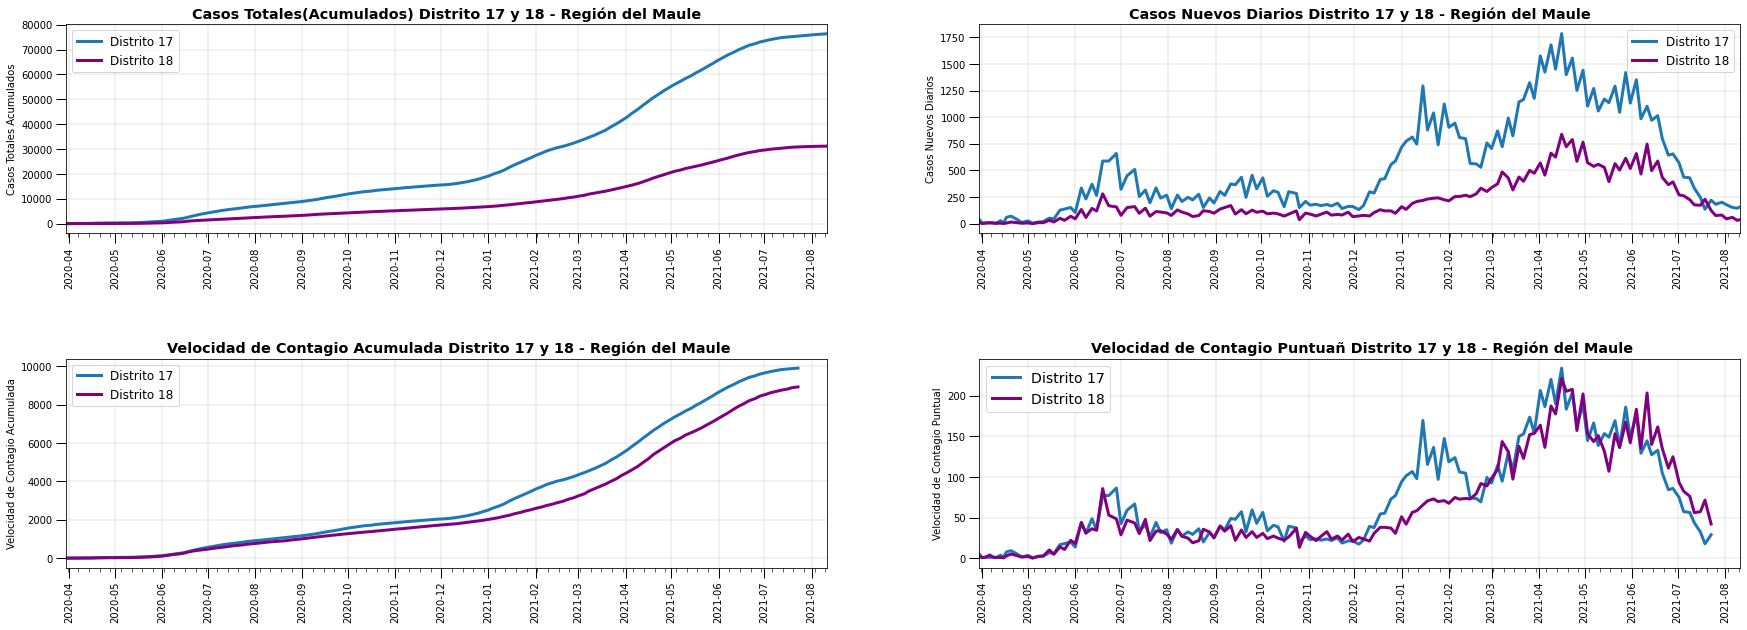

In [61]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(30,10))
fig.subplots_adjust(hspace=0.6)
axes = axes.flatten()

#Grafico 1
ax = axes[0]
ax.plot(Casos_17['Fecha'], Casos_17['Casos confirmados'], lw=3, label='Distrito 17')
ax.plot(Casos_17['Fecha'], Casos_18['Casos confirmados'],color='purple', lw =3, label='Distrito 18')#, marker='.')
ax.set_title('Casos Totales(Acumulados) Distrito 17 y 18 - Región del Maule', size='x-large', weight='bold')
ax.set_ylabel('Casos Totales Acumulados')
ax.tick_params(axis='x', labelrotation= 90) 

# Major ticks every 1 months.
fmt_half_year = mdates.MonthLocator()
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every week.
fmt_month = mdates.WeekdayLocator()
ax.xaxis.set_minor_locator(fmt_month)


datemin = np.datetime64('2020-03-30')
datemax = np.datetime64('2021-08-11')
ax.set_xlim(datemin, datemax)

ax.grid(True, lw=0.2, c='gray')

ax.tick_params(which='major', length=10, width=1)
ax.tick_params(which='minor', length=4)

ax.legend(fontsize=12, loc='best')

#Grafico 2
ax = axes[1]
ax.plot(Casos_17['Fecha'], Casos_17['Casos_nuevos_diarios'], lw=3, label='Distrito 17')
ax.plot(Casos_17['Fecha'], Casos_18['Casos_nuevos_diarios'],color='purple', lw =3, label='Distrito 18')#, marker='.')
ax.set_title('Casos Nuevos Diarios Distrito 17 y 18 - Región del Maule', size='x-large', weight='bold')
ax.set_ylabel('Casos Nuevos Diarios')
ax.tick_params(axis='x', labelrotation= 90) 

# Major ticks every 1 months.
fmt_half_year = mdates.MonthLocator()
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every week.
fmt_month = mdates.WeekdayLocator()
ax.xaxis.set_minor_locator(fmt_month)


datemin = np.datetime64('2020-03-30')
datemax = np.datetime64('2021-08-11')
ax.set_xlim(datemin, datemax)

ax.grid(True, lw=0.2, c='gray')

ax.tick_params(which='major', length=10, width=1)
ax.tick_params(which='minor', length=4)

ax.legend(fontsize=12, loc='best')

#Grafico 3
ax = axes[2]
ax.plot(Confirmados17['Fecha'], Confirmados17['Inc_acumulada'], lw=3, label='Distrito 17')
ax.plot(Confirmados18['Fecha'], Confirmados18['Inc_acumulada'],color='purple', lw =3, label='Distrito 18')#, marker='.')
ax.set_title(' Velocidad de Contagio Acumulada Distrito 17 y 18 - Región del Maule', size='x-large', weight='bold')
ax.set_ylabel('Velocidad de Contagio Acumulada')
ax.tick_params(axis='x', labelrotation= 90) 

# Major ticks every 1 months.
fmt_half_year = mdates.MonthLocator()
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every week.
fmt_month = mdates.WeekdayLocator()
ax.xaxis.set_minor_locator(fmt_month)


datemin = np.datetime64('2020-03-30')
datemax = np.datetime64('2021-08-11')
ax.set_xlim(datemin, datemax)

ax.grid(True, lw=0.2, c='gray')

ax.tick_params(which='major', length=10, width=1)
ax.tick_params(which='minor', length=4)

ax.legend(fontsize=12, loc='best')


#Grafico 4
ax = axes[3]
ax.plot(Confirmados17['Fecha'], Confirmados17['Inc_puntual'], lw=3, label='Distrito 17')
ax.plot(Confirmados18['Fecha'], Confirmados18['Inc_puntual'],color='purple', lw =3, label='Distrito 18')#, marker='.')
ax.set_title(' Velocidad de Contagio Puntuañ Distrito 17 y 18 - Región del Maule', size='x-large', weight='bold')
ax.set_ylabel('Velocidad de Contagio Puntual')
ax.tick_params(axis='x', labelrotation= 90) 

# Major ticks every 1 months.
fmt_half_year = mdates.MonthLocator()
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every week.
fmt_month = mdates.WeekdayLocator()
ax.xaxis.set_minor_locator(fmt_month)


datemin = np.datetime64('2020-03-30')
datemax = np.datetime64('2021-08-11')
ax.set_xlim(datemin, datemax)

ax.grid(True, lw=0.2, c='gray')

ax.tick_params(which='major', length=10, width=1)
ax.tick_params(which='minor', length=4)

ax.legend(fontsize=14, loc='best')


Las visualizaciones que se obtienen, derivadas de los productos 1 y 6 del GitHub del Ministerio de Ciencias. Dos de ellas tienen como eje de las ordenas al total de casos acumulados y casos totales diarios vs el tiempo. Y otras dos la incidencia acumulada, o velocidad acumulada, e incidencia puntual o velocidad puntual vs el tiempo.  

Para las gráficas de Casos totales y nuevos diarios (gráficos superiores derecho e izquierdo), se puede observar que las curvas en casos acumulados siguien la misma tendencia, sin embargo, la cantidad de casos es mayor para el Distrito 17 y esto se debe a que la población del Distrito 17(762147 habitantes) es aproximadamente el doble que la del Distrito 18(336982 habitantes). En el caso del numero de casos diarios, comienzan con valores similares, sin embargo, con la evolución de la pandemia se separan las curvas siendo el Distrito 17 muy superior en casos al Distrito 18. 


Para el caso de velocidad de contagio (gráficos inferiores derecho e izquierdo), se debe recalcar que la velocidad es la incidencia, o número de casos nuevos por cada 100.000 habitantes (es una tasa). Se obtienen dos gráficos, uno muestra la incidencia acumulada (gráfico de la izquierda) y el otro la incidencia puntual, o el número nuevo de casos diarios o en un período corto de tiempo, por cada 100.000 habitantes. Para esta gráfica de la derecha, ese intérvalo es de 3 días, como están en la base de datos que se usó. 

Se observa que la incidencia acumulada por cada 100.000 habitantes fueron muy parejas hasta el mes de marzo aproximadamente, cuando se empieza a separar las curvas. Para mediados del año en curso ya hay, visualmente, una separación evidente de las curvas, y el distrito 17 presenta una mayor incidencia o velocidad para los meses de julio-agosto de este año. Se sugiere hacer estimaciones estadísticas para determinar si esa diferencia es significativa. 

En el caso del gráfico inferior derecho, o incidencia promedio de cada tres días, se evidencia que en el transcurso del 2020, las velocidades de contagio fueron similares, hasta diciembre de ese año. En 2021, se empezó a observar el ascenso gradual que llevó a la segunda ola, sin embargo, para los meses de enero-marzo de 2021, la pendiente fue mayor en el distrito 17, con un peak que superó los 150 casos por cada 100.000 habitantes. Si se aprecia la gráfica superior derecha del número de casos diarios, se observa que, para ese momento, los casos en ese distrito sobrepasó los 1250. 

Para los meses de julio-agosto de 2021, ya se observa una disminución importante de la incidencia puntual, a diferencia del comportamiento en la mayoría del tiempo de la pandemia, el distrito 18 actualmente tiene una velocidad de contagio ligeramente mayor. En el distrito 17, por ejemplo, ya se tienen valores más bajos que en el período entre las olas, lo que podría sugerir la efectividad de la campaña de vacunación.



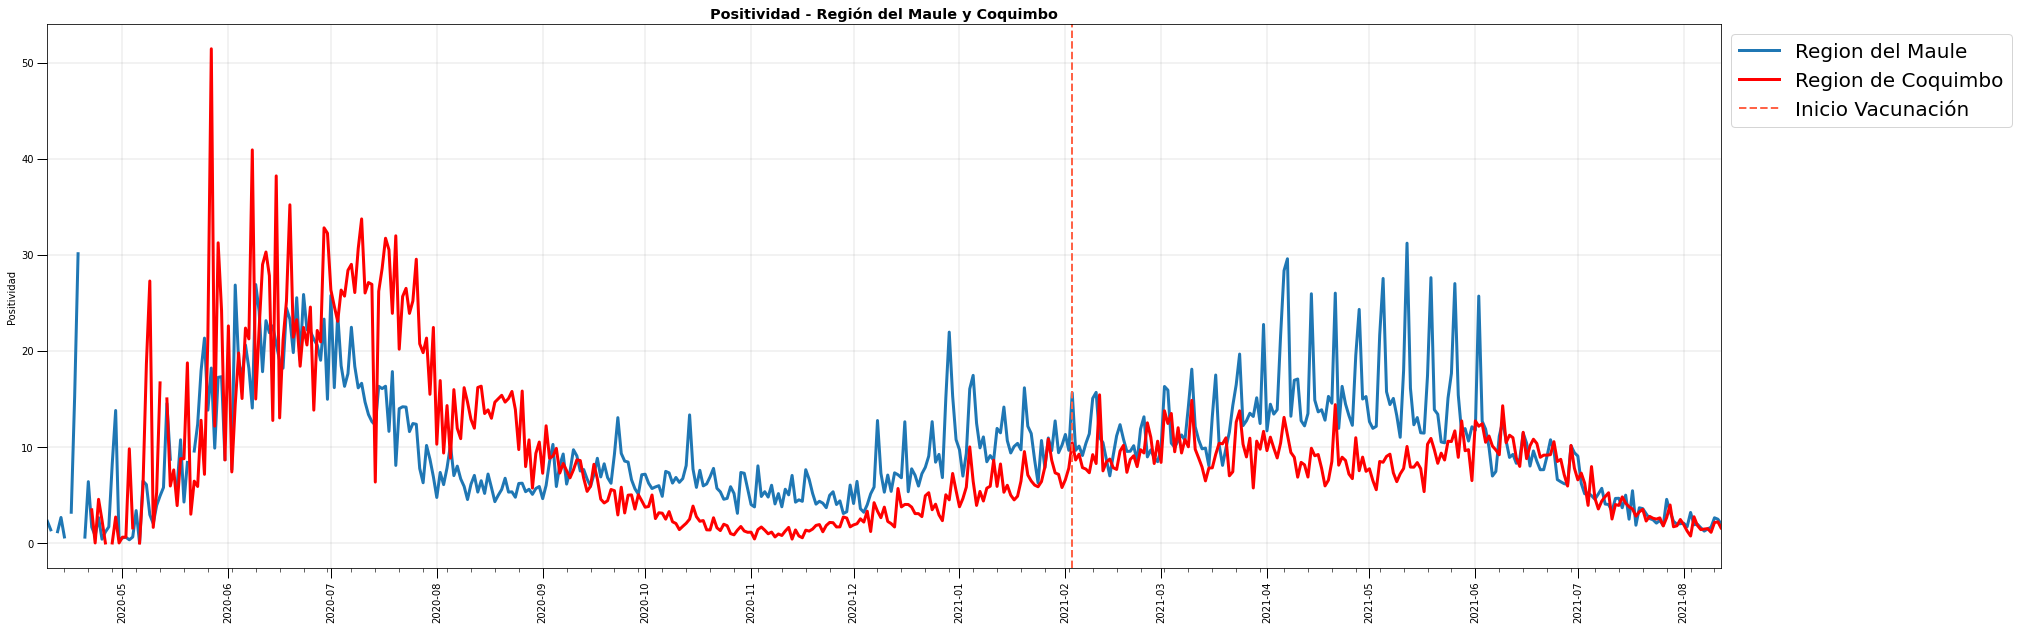

In [60]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(30,10))
fig.subplots_adjust(hspace=0.6)
#axes = axes.flatten()

ax = axes
ax.plot(df_maule['FECHA'], df_maule['Positividad'], lw=3, label='Region del Maule')
ax.plot(df_coq['FECHA'], df_coq['Positividad'], lw=3, label='Region de Coquimbo',color='red')
#ax.plot(df_maule['Fecha'], df_coq['Positividad'],color='purple', lw =3, label='Region de Coquimbo')#, marker='.')
ax.set_title('Positividad - Región del Maule y Coquimbo', size='x-large', weight='bold')
ax.set_ylabel('Positividad')
ax.tick_params(axis='x', labelrotation= 90) 
ax.axvline(np.datetime64('2021-02-03'), color='tomato', linestyle='--', lw=2, label='Inicio Vacunación')

# Major ticks every 1 months.
fmt_half_year = mdates.MonthLocator()
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every week.
fmt_month = mdates.WeekdayLocator()
ax.xaxis.set_minor_locator(fmt_month)


datemin = np.datetime64('2020-04-09')
datemax = np.datetime64('2021-08-12')
ax.set_xlim(datemin, datemax)

ax.grid(True, lw=0.2, c='gray')

ax.tick_params(which='major', length=10, width=1)
ax.tick_params(which='minor', length=4)

ax.legend(bbox_to_anchor=(1,1),fontsize=20, loc='upper left')


**Interpretación Positividad:** 

Se obtiene como resultado un gráfico con el índice de positividad en el eje de las ordenadas y el tiempo en el eje de las abscisas. En primer lugar, se destaca que la Región del Maule presentó los primeros casos de COVID19, ya que el caso 0 se diagnosticó en la comuna de San Javier. Por esta razón la línea azul se inicia primero. Sin embargo, en la primera ola, que ocurrió entre junio a agosto de 2020, la región de Coquimbo tuvo mayor índice de positivad, y también perduró más, ya que se aprecian valores mayores de 10% hasta el mes de septiembre. Por otro lado, el Maule, para el mes de septiembre, presentó un indice de positividad menos de 10, lo que daba por terminada la primera ola para esa fecha. 

En el intérvalo de tiempo de otoño y principios de verano, de octubre 2020 a diciembre de 2020, o período entre olas, los casos se mantuvieron estables en menos de 10%, sin embargo, el Maule tuvo un nivel un poco más alto. 

En la segunda ola, una vez se comenzó la vacunación en febrero de 2021, tuvo un comportamiento distinto. En primer lugar, el Maule presentó mayores índices de positividad que Coquimbo, con peaks intermitentes que superaban el valor de 30. Al contrario, Coquimbo tuvo un comportamiento más estable en el tiempo, con valores que presentaron algunos peaks intermitentes que superaban los 10. 

En conclusión, se puede inferir que el comportamiento de positividad entre regiones pudo haber sido distintos durante los peaks de incidencia (ola de contagios). Siendo una más afectadas que otras. En este caso, Coquimbo tuvo un mejor desempeño en controlar la transmisión del virus en el 2021, una vez que se inició la vacunación. En cambio, el desempeño del Maule fue mejor que Coquimbo en el inicio de la pandemia. Se aconseja la búsqueda de las causas que hayan causado mayor positividad de casos en el Maule a mediados de 2021. Igualmente, se aconseja obtener estas gráficas por cada distrito en cada una de las regiones, actualmente no se dispone de algún producto en el GitHub que permita obtenerlo, de esta manera, se podrían conocer las zonas específicas de mayor incidencia o positividad y así, tomar las precauciones y políticas sanitarias correspondientes para que no se repita en el futuro. 



